In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipcodes as zcode
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')

In [1]:
!pip install zipcodes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 167.0 kB/s eta 0:00:0000:0100:01


In [5]:
!pip install basemap

  Using cached basemap-1.3.7.zip (156 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 2
  ╰─> [91 lines of output]
      Ignoring numpy: markers 'python_version >= "3.11"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.10"' don't match your environment
      Ignoring numpy: markers 'sys_platform != "darwin" and (python_version >= "3.7" and python_version <= "3.9")' don't match your environment
      Ignoring numpy: markers 'python_version == "2.7" or (python_version >= "3.4" and python_version <= "3.6")' don't match your environment
      Ignoring numpy: markers 'python_version == "2.6" or (python_version >= "3.2" and python_version <= "3.3")' don't match your environment
      Ignoring cython: markers 'python_version == "3.2"' don't match your environment
        Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
     

In [6]:
data=pd.read_csv("/Users/behrad/Documents/imt tmrin/Bank_Personal_Loan_Modelling.csv")
df= pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [7]:
df.drop('ID',axis=1,inplace=True)
df
# id is unusfull

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [8]:
df.info()
#no NAN in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   ZIP Code            5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 507.9+ KB


In [10]:
df.describe()


,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
# we have negative value in experience we should remove it
#df['Experience']=abs (df['Experience']) mosbat kardan maqadir manfi
df = df[df['Experience'] >= 0]
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [7]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,93151.573363,2.391471,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,2126.669017,1.148444,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


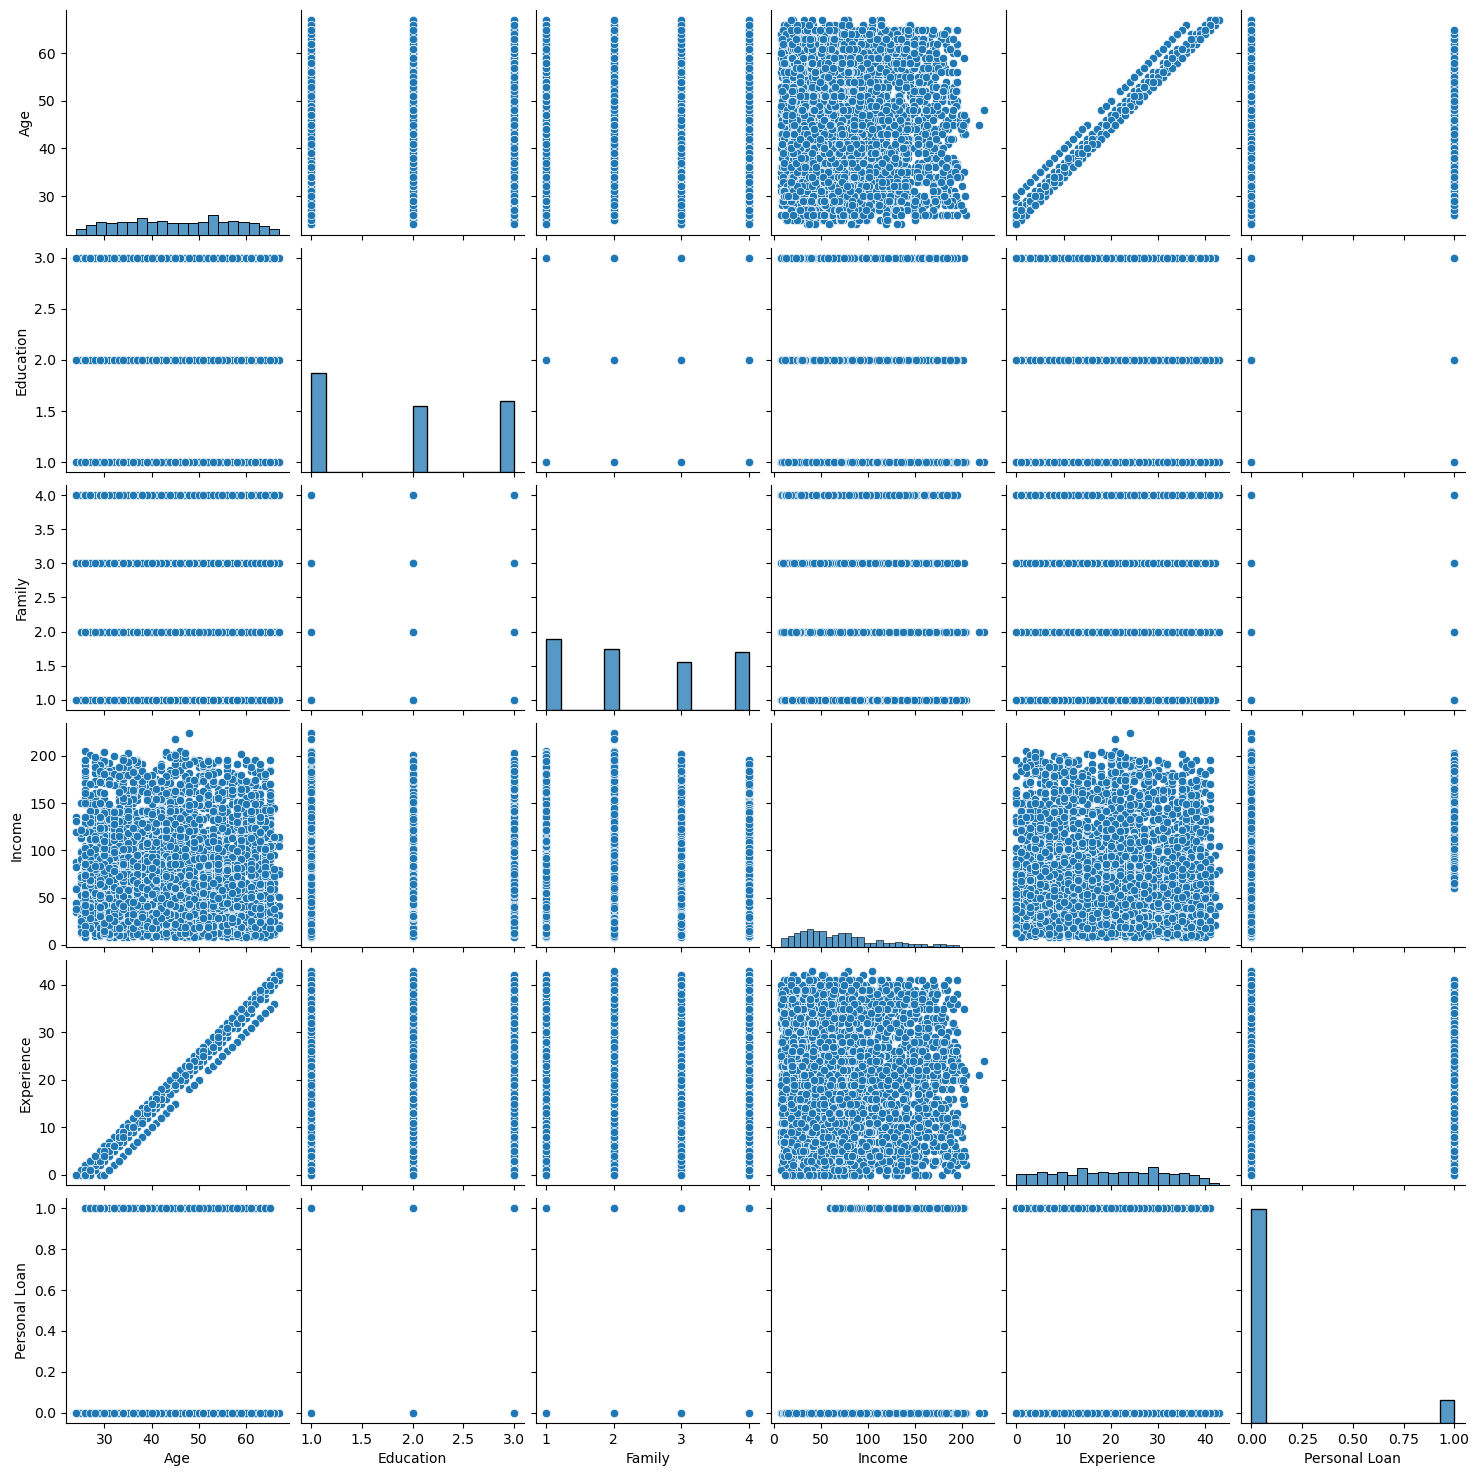

In [8]:
sns.pairplot(df[['Age','Education','CCAvg','Family','Income', 'Experience', 'Personal Loan']])
plt.show()

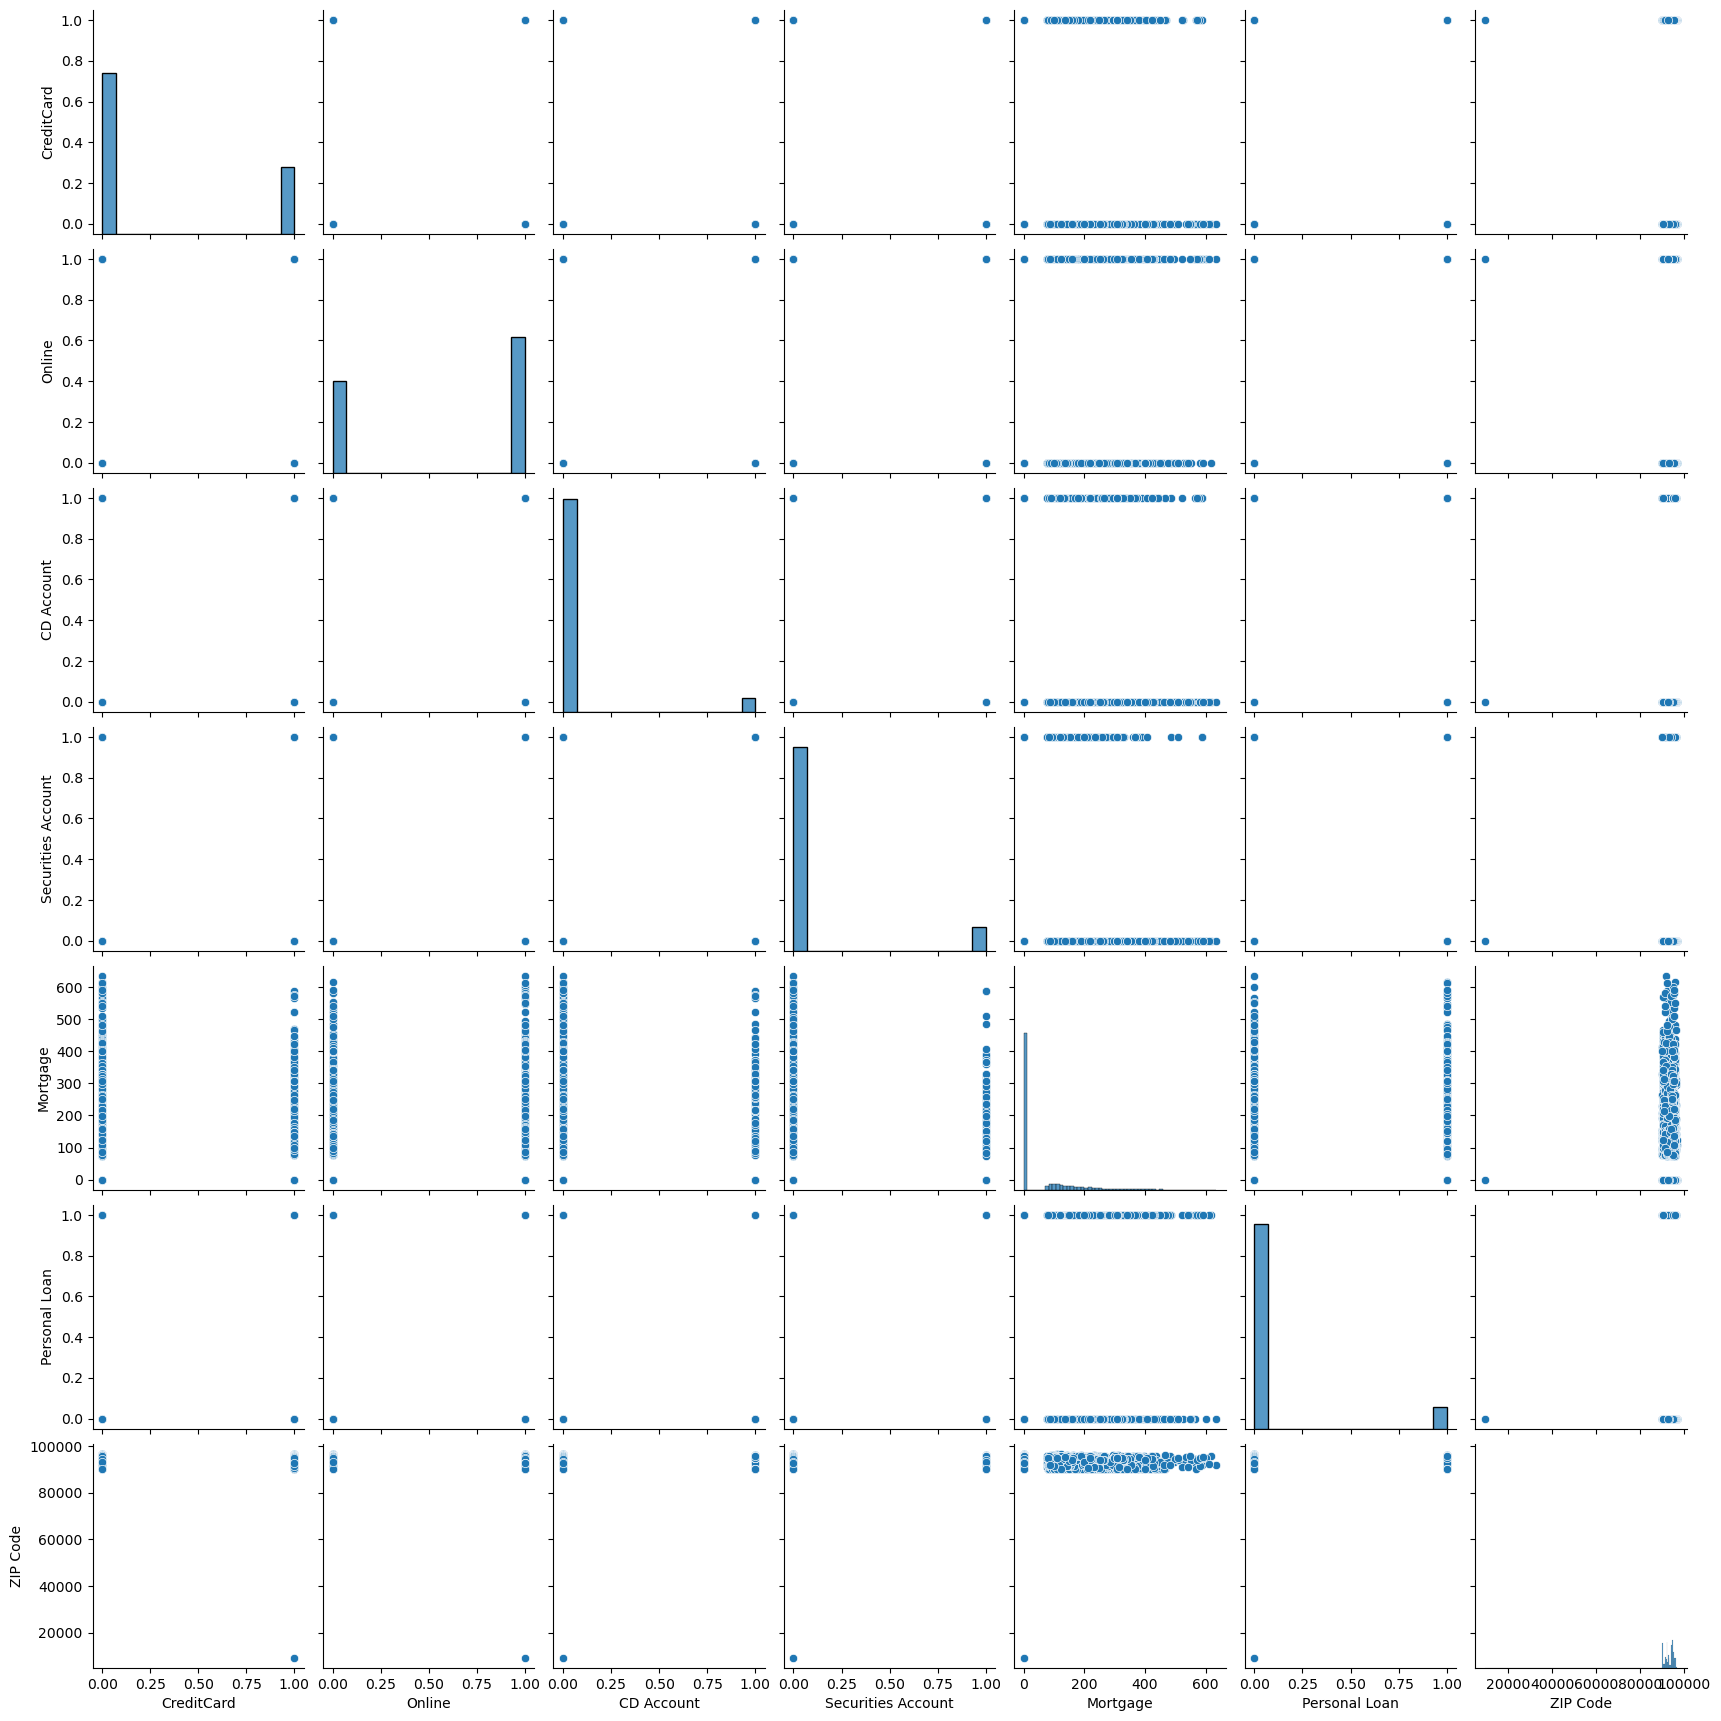

In [27]:
sns.pairplot(df[['CreditCard','Online','CD Account','Securities Account','Mortgage', 'Personal Loan','ZIP Code']])
plt.show()


In [ ]:
## ye count ham bayad gereft










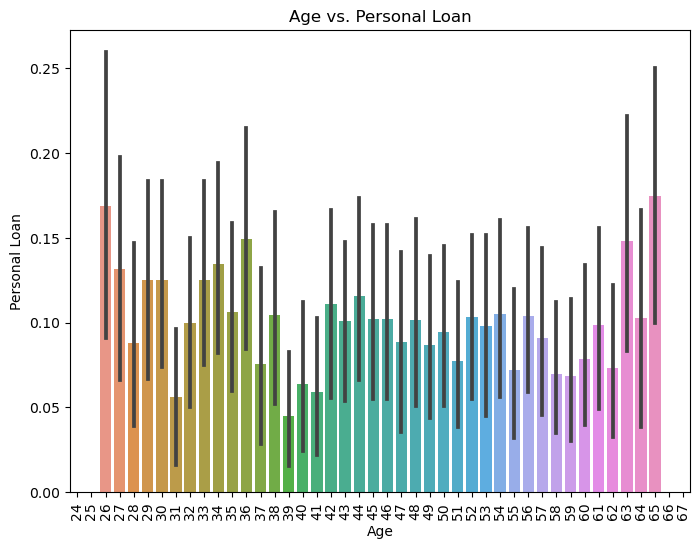

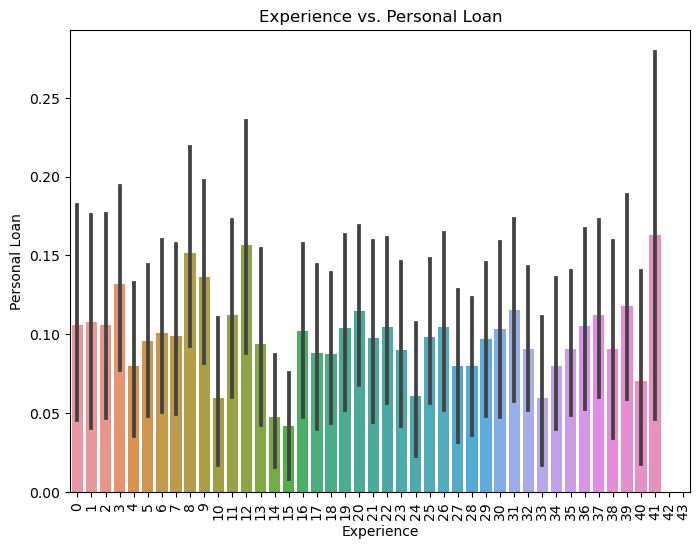

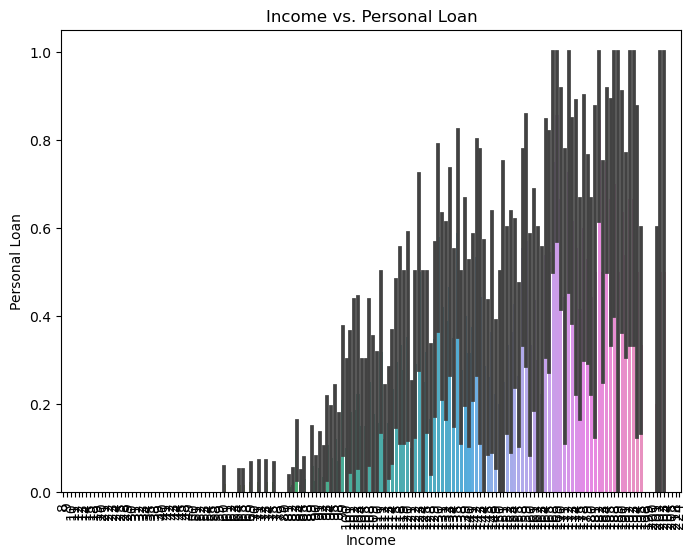

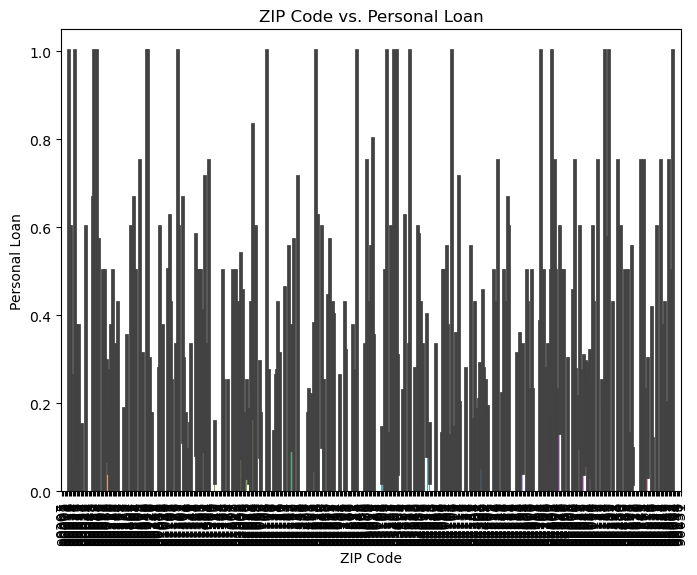

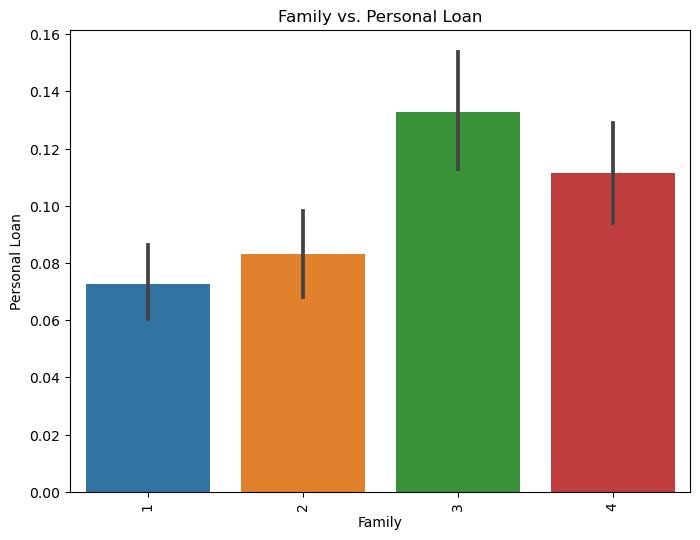

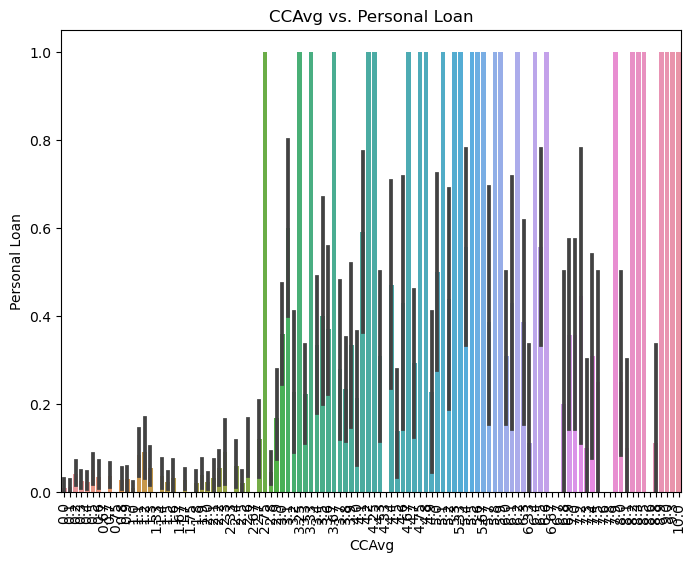

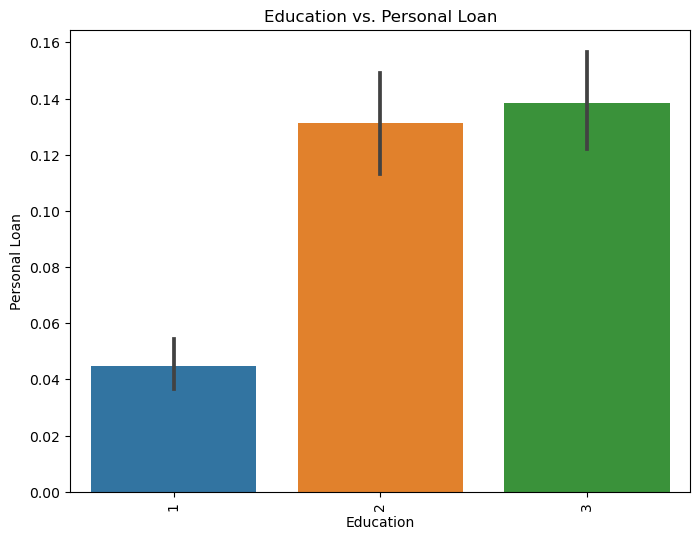

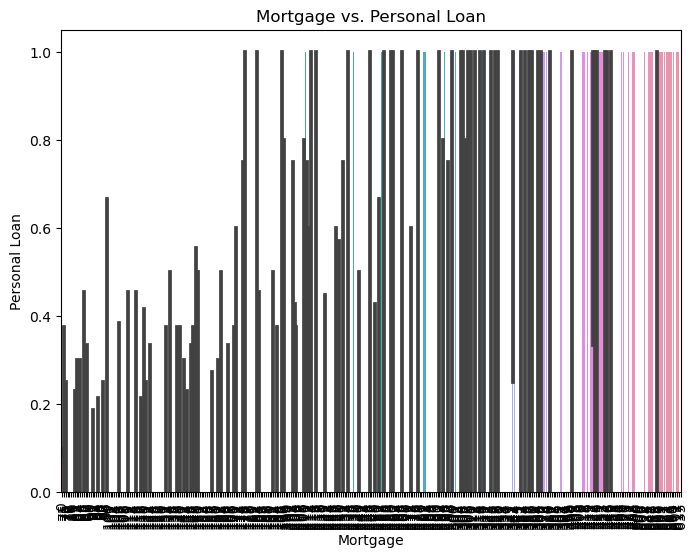

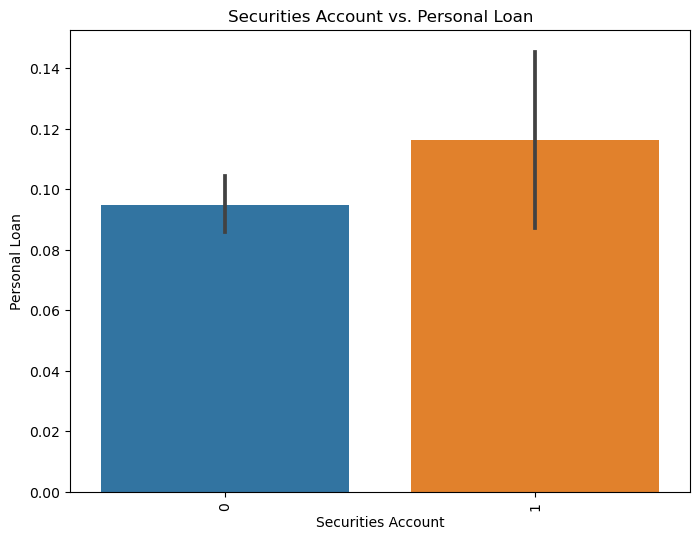

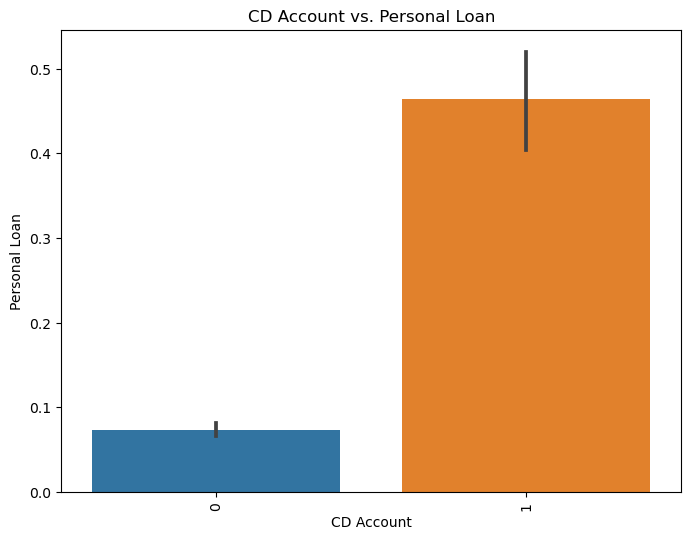

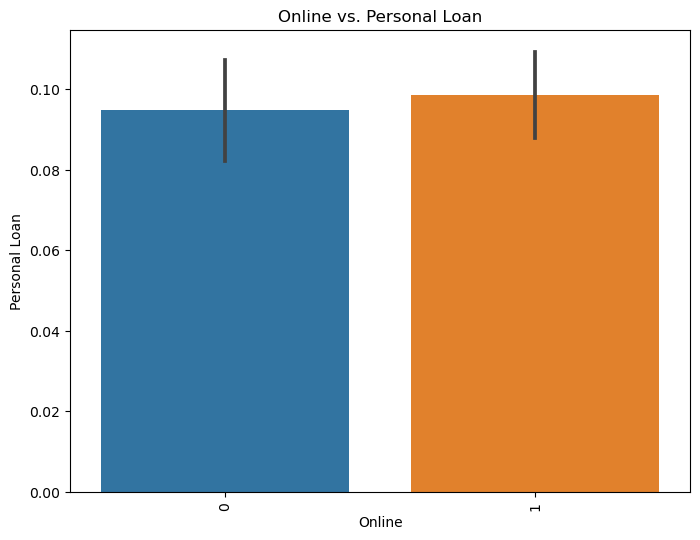

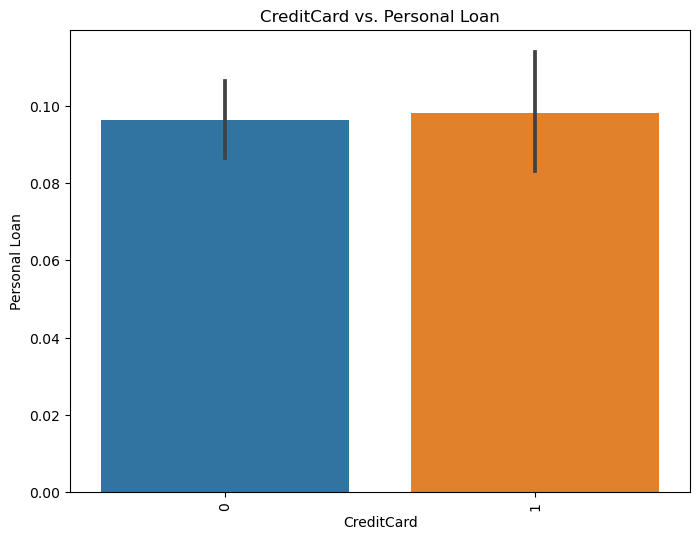

In [28]:
for feature in df.drop('Personal Loan', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='Personal Loan', data=df)
    plt.xlabel(feature)
    plt.ylabel('Personal Loan')
    plt.title(f'{feature} vs. Personal Loan')
    plt.xticks(rotation=90) 
    plt.show()

In [11]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [12]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.50,2,0,0,0,0,1,0


In [13]:
df['CCAvg'] = df['CCAvg'].astype(float)

In [14]:
df['ZIP Code'].nunique()

467

# plt.scatter (df ['ZIP Code'], df ['Personal Loan'])
plt.annotate ('maybe noise', xy= (9500, 0) ,xytext= (13000, .25),arrowprops =dict (facecolor='black', shrink=0.05))
##ba in ye noqtaro ro plot moshakhas mikonim
plt.show ()

In [27]:
noise=df[df['ZIP Code']<20000]
noise

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [28]:
df.drop(index=384, inplace=True)

In [29]:
list_zipcode=list (df['ZIP Code'])

# Extract data from zipcode

In [66]:
country=[] #To place countries 
lat=[] #To latitude of each sample 
long=[] #To longitude of each sample
for x in list_zipcode: #This loop check each value of ZIP Code
    my_city_county = zcode.matching (str (x)) #Used as zipcode library
    if len (my_city_county) ==1: #There is information for this zip code if the value is one
        County=my_city_county[0].get ('county')
        Lat = my_city_county[0].get ('lat')
        Long = my_city_county[0].get ('long')
    else: #When there aren't any information for this zip code
        County="Notfound"
        Lat=np.NaN
        Long=np.NaN
    country. insert (0, County) #Insert to end of list
    lat.insert (0,Lat) #Insert to end of list 
    long.insert (0,Long) #Insert to end of list
country.reverse () #Revarse list country
lat.reverse () #Revarse list lat 
long.reverse () #Revarse list long
#Make new columns
df ["Place"]=country
df["Latitude"]=lat
df ["Longitude"]=long


In [67]:
#Check to make sure about function
print (zcode.matching (str (92612))) #This zip code for the end sample
df

[{'zip_code': '92612', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Irvine', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Orange County', 'timezone': 'America/Los_Angeles', 'area_codes': ['714', '949'], 'world_region': 'NA', 'country': 'US', 'lat': '33.6615', 'long': '-117.8217'}]


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Orange County,33.6473,-117.8409
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,San Diego County,32.8668,-117.2482
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ventura County,34.5210,-119.2477
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles County,34.0293,-118.3994


In [68]:
df=df.astype ({'Latitude': float, 'Longitude': float}) #Change type of value

In [69]:
df.describe(include='all')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947,4915.000000,4915.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1086,NaN,NaN
mean,45.556095,20.330099,73.825147,93168.521932,2.391146,1.936196,1.878714,56.645846,0.097029,0.104306,0.061047,0.596927,0.293916,NaN,35.793536,-120.039680
std,11.321615,11.312922,46.111141,1761.253907,1.148333,1.747768,0.839679,101.835994,0.296026,0.305688,0.239441,0.490565,0.455600,NaN,2.099605,2.092402
min,24.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,32.554700,-124.099400
25%,36.000000,10.500000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,34.006800,-122.148500
50%,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,35.390700,-120.042400
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,37.748700,-118.089400


In [70]:
df [df['Place']=="Notfound" ] ['ZIP Code' ].value_counts ()

92717    22
96651     6
92634     4
Name: ZIP Code, dtype: int64

In [71]:
def highlight_cols (s) :
    color='yellow'

    return'background-color: %s' % color


In [72]:
z_92717=list(df[df ["ZIP Code"]==92717].index)
for x in z_92717 :
    df ["Place"].loc [x]= 'Irvine'
    df ["Latitude"].loc [x]=33.6462
    df ["Longitude"].loc [x]=-117.8398
df[df ["ZIP Code"]==92717].style.applymap (highlight_cols, subset=pd.IndexSlice [:, ['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
106,43,17,69,92717,4,2.900000,1,0,0,0,0,1,1,Irvine,33.646200,-117.839800
172,38,13,171,92717,2,7.800000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800
184,52,26,63,92717,2,1.500000,2,0,0,1,0,1,0,Irvine,33.646200,-117.839800
321,44,20,101,92717,3,4.400000,2,82,1,0,0,0,0,Irvine,33.646200,-117.839800
366,50,24,35,92717,1,0.300000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
476,60,34,53,92717,1,0.800000,2,0,0,1,0,0,1,Irvine,33.646200,-117.839800
695,29,4,115,92717,1,1.900000,1,0,0,0,0,0,0,Irvine,33.646200,-117.839800
721,49,24,39,92717,1,1.400000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1099,30,6,52,92717,3,0.700000,2,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1189,42,17,115,92717,2,0.400000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800


In [77]:
df.dropna(how='any',inplace=True)
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Latitude,Longitude
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,45.569374,20.342516,73.906623,93164.722706,2.390926,1.938213,1.878266,56.713794,0.097225,0.104517,0.061171,0.597124,0.293903,35.783967,-120.029877
std,11.319298,11.311056,46.112478,1758.781380,1.148206,1.748369,0.839638,101.906566,0.296294,0.305961,0.239668,0.490526,0.455594,2.099798,2.092871
min,24.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.554700,-124.099400
25%,36.000000,11.000000,39.000000,91910.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.001800,-122.148500
50%,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.301700,-119.867400
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,37.748700,-118.078600
max,67.000000,43.000000,224.000000,96150.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.758900,-115.630500


# plot ro ax

In [78]:
img = plt.imread ("map.jpg") #Get image as file # axo bayad dashte bashim
#Separation by personal loan
target_0 = df[df["Personal_Loan"]==0]
target_1 = df [df["Personal_Loan"]==1]
#Plot
fig, axs = plt.subplots (figgize= (15, 10))
#Show image in background
axs.imshow (img,extent=[-126, -114, 32, 43],alpha=.7)
#Scatter plot
axs.scatter (target_0 ['Longitude'],target_0 ['Latitude'],c='cyan', alpha=.5, label="Loan 0")
axs.scatter (target_1 ['Longitude'],target_1 ['Latitude'],c='r', alpha=.5, label='Loan 1')
pit.title ('Longitude & Latitude', fontsize=30,backgroundcolor='black',c="white") #Title
plt.xlabel ('Longitude', fontsize=20) #xlabel
pit.ylabel ('Latitude',fontsize=20) #Ylabel
plt.grid() #Line in plot
plt.legend (loc='best') #Help map
plt.show ()

FileNotFoundError: [Errno 2] No such file or directory: 'map.jpg'

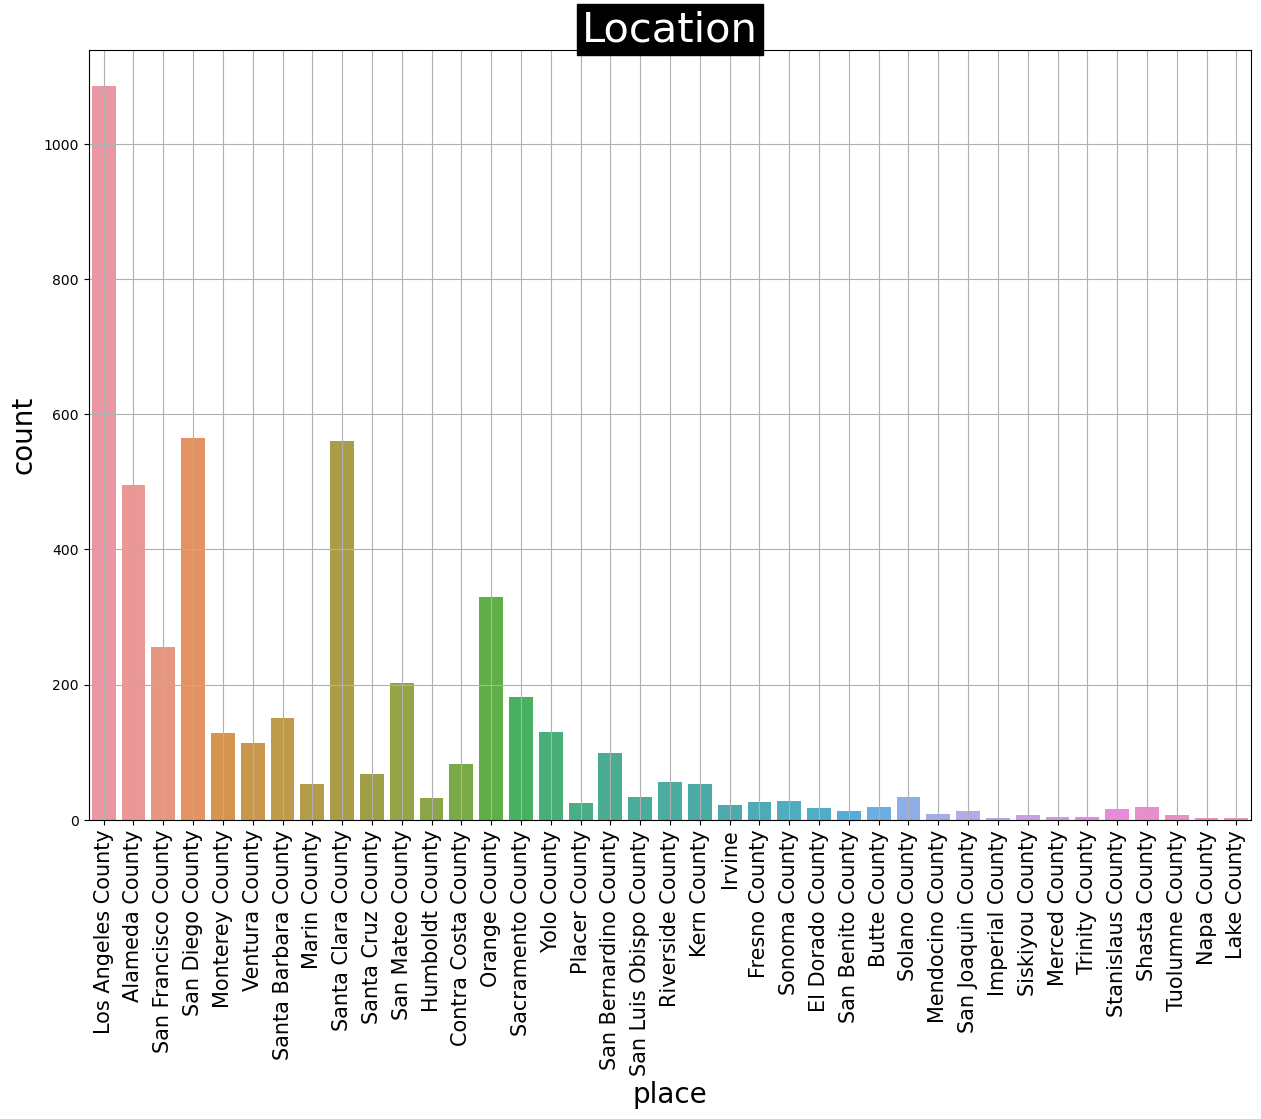

In [82]:
plt.figure (figsize= (15,10)) #Size plot
sns.countplot (x="Place", data=df) #Count sample for each place
plt.title ('Location', fontsize=30, backgroundcolor='black', c='white') #Title 
plt.grid () #Liner
plt.xticks (rotation=90, fontsize=15) #Xticks
plt.xlabel ("place", fontsize=20) 
plt.ylabel ("count", fontsize=20)
plt.show ()

# correlation featur ha

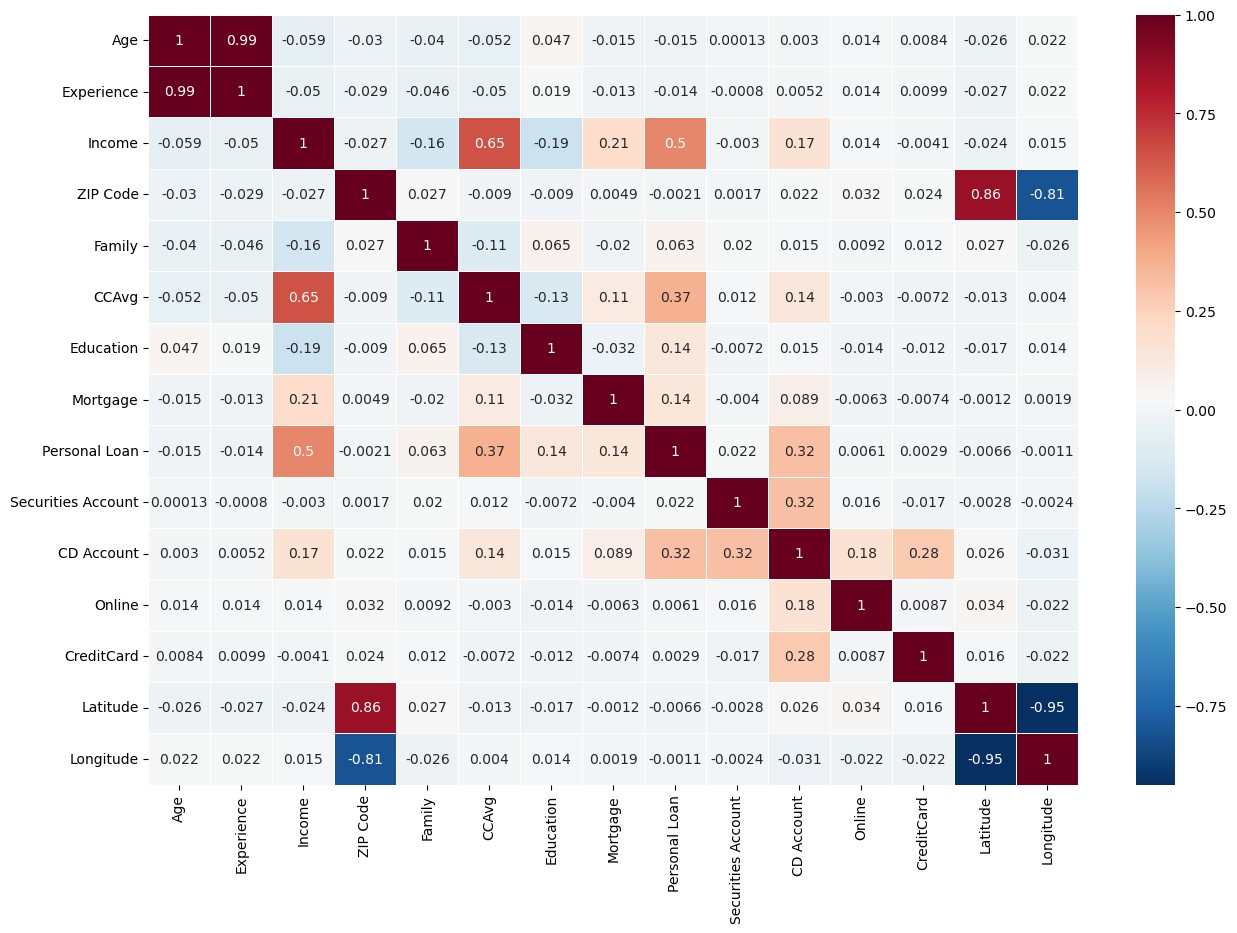

In [83]:
fig, ax = plt.subplots (figsize = (15, 10)) #Size of plot
sns.heatmap (df.corr () , cmap='RdBu_r', cbar=True, annot=True, linewidths=0.5,ax=ax) #Plot heatmap
plt.show()


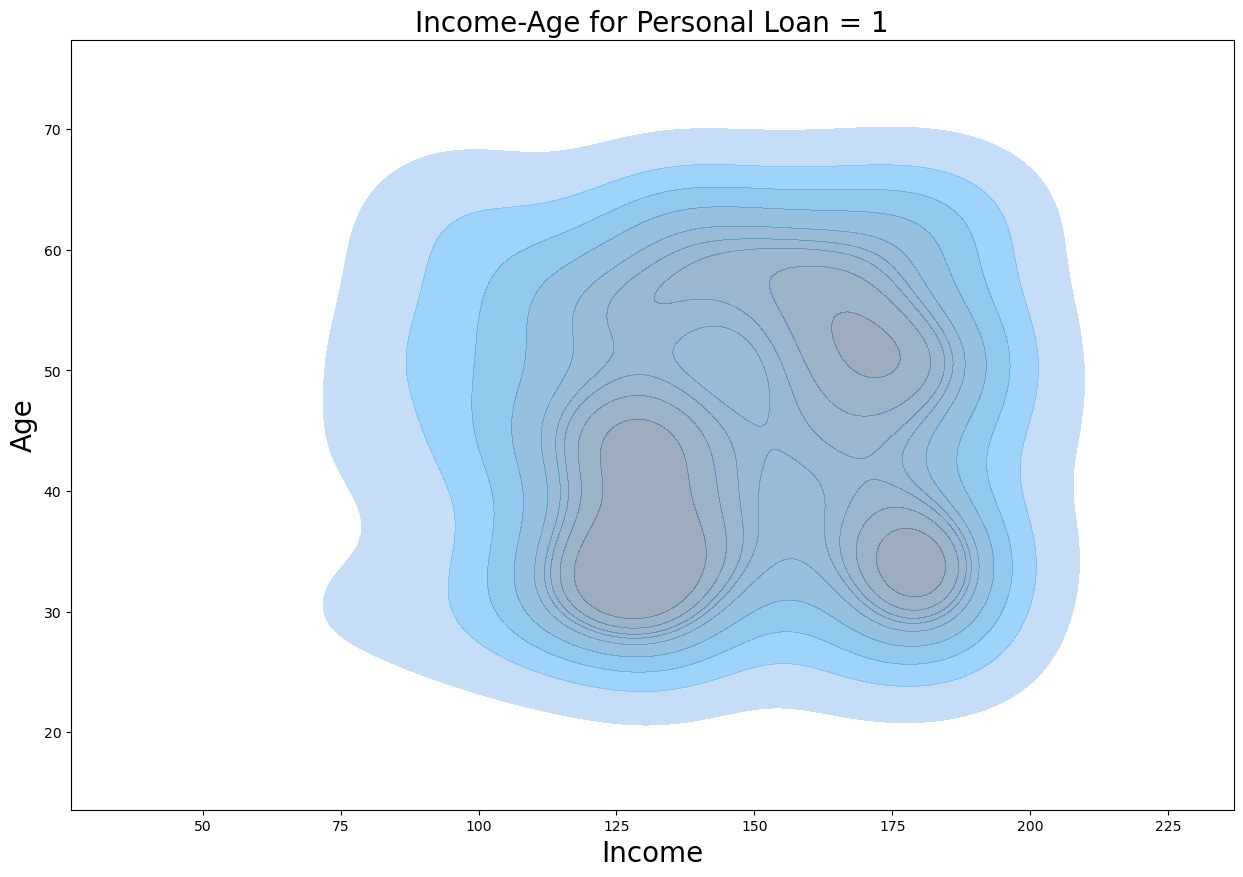

In [99]:
df_personal_loan_1 = df[df['Personal Loan'] == 1]

plt.figure(figsize=(15, 10))
sns.kdeplot(data=df_personal_loan_1, x='Income', y='Age', shade=True, fill=True, common_norm=False, palette='crest', alpha=0.5, linewidth=0)
plt.title("Income-Age for Personal Loan = 1", fontsize=20)
plt.xlabel("Income", fontsize=20)
plt.ylabel("Age", fontsize=20)

plt.show()

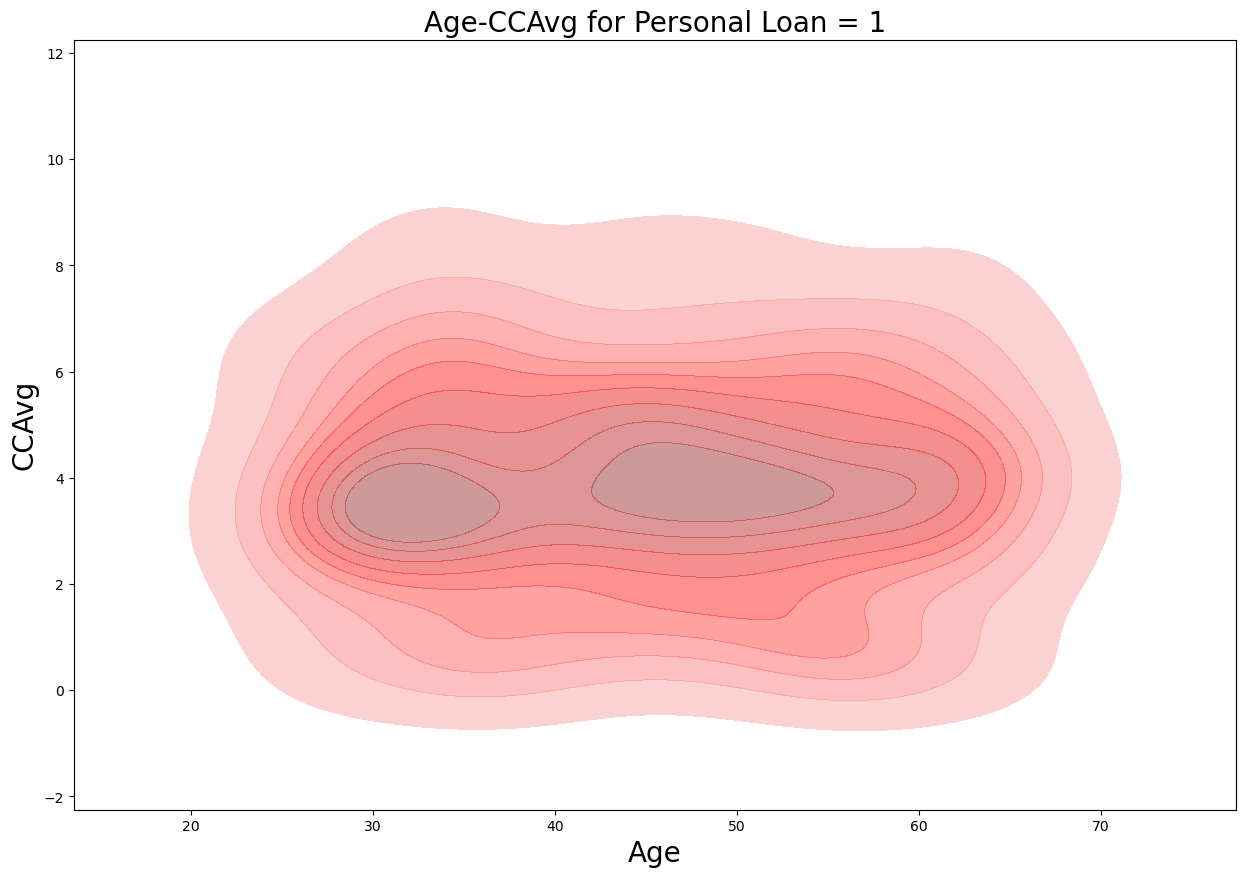

In [101]:
df_personal_loan_1 = df[df['Personal Loan'] == 1]

plt.figure(figsize=(15, 10))
sns.kdeplot(data=df_personal_loan_1, x='Age', y='CCAvg', shade=True, fill=True, common_norm=False, palette='crest',color='red', alpha=0.5, linewidth=0)
plt.title("Age-CCAvg for Personal Loan = 1", fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("CCAvg", fontsize=20)

plt.show()

##onja hayi ke porrang tare yani bishtaran

In [ ]:
#LOOP FOR BEST TESTSIZE

In [114]:
#This function take data and test size next get x train, , x test, y train, y test 


def Logreg(X, y, Testsize, solvers):
    df_evaluation = pd.DataFrame()

    best_solver = None
    best_accuracy = 0.0

    for solver in solvers:
        for test_size in Testsize:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
            logreg = LogisticRegression(solver=solver, class_weight='balanced')
            logreg.fit(X_train, y_train)
            y_pred = logreg.predict(X_test)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            score = logreg.score(X, y)
            dict_data = {'Solver': solver, 'Test_size': test_size, 'Accuracy': accuracy, 'Score': score}

            df_evaluation = df_evaluation.append(dict_data, ignore_index=True)

            # Update the best solver if a better accuracy is found
            if accuracy > best_accuracy:
                best_solver = solver
                best_accuracy = accuracy

    return X_train, X_test, y_train, y_test, y_pred, df_evaluation, best_solver, best_accuracy

# Rest of your code

#This function highlights Maximum values
def highlight_max (s) :
    is_max = s==s.max()

    return ['background-color: yellow' if v else '' for v in is_max]

In [117]:
X=df.drop(columns=['Personal Loan','Place'])
y=df[['Personal Loan']].values.reshape(-1,1)

In [118]:
solvers_to_test = ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
X_train, X_test, y_train, y_test, y_pred, df_evaluation, best_solver, best_accuracy = Logreg(X, y, Testsize=[0.1,.15,.2,.35,.30], solvers=solvers_to_test)

print("Best Solver:", best_solver) 
df_evaluation.style.apply (highlight_max)

Best Solver: sag


,Solver,Test_size,Accuracy,Score
0,liblinear,0.100000,0.878543,0.895483
1,liblinear,0.150000,0.875843,0.895078
2,liblinear,0.200000,0.876518,0.894875
3,liblinear,0.350000,0.885417,0.897914
4,liblinear,0.300000,0.878543,0.897104
5,lbfgs,0.100000,0.850202,0.849504
6,lbfgs,0.150000,0.871795,0.876848
7,lbfgs,0.200000,0.859312,0.849301
8,lbfgs,0.350000,0.872106,0.875430
9,lbfgs,0.300000,0.850202,0.848288


In [14]:
##grid search ham mishe estefade kard baraye emtehan kardane hyperparametr haye mokhtalef

# logistic regrassion

In [120]:
x=df[['Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account']]
y=df[['Personal Loan']].values.reshape(-1,1)

In [121]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30,random_state=0)

In [43]:
regr=LogisticRegression()
model=regr.fit(x_train,y_train)

In [44]:
y_pred= regr.predict(x_test)

In [59]:

kf_validation=KFold(20)

result= cross_val_score(model,x,y,cv=kf_validation)
print(result)

[0.96774194 0.92741935 0.94758065 0.93951613 0.93548387 0.96774194
 0.93145161 0.93951613 0.97165992 0.93522267 0.94331984 0.951417
 0.96761134 0.93117409 0.93117409 0.93927126 0.95546559 0.96761134
 0.93117409 0.95546559]


In [53]:
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred))

Accuracy: 0.9494949494949495


In [ ]:
compare= pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
compare

In [78]:
y_predf= regr.predict([[30,3,1.2,3,0,1,0]])
y_predf

array([0])

In [95]:
cross_entropy = -(y_test * np.log(y_pred) + (1 - y_test) * np.log(1 - y_pred))


average_cross_entropy = np.mean(cross_entropy)


print("Individual Cross-Entropy Terms:", cross_entropy)
print("Average Cross-Entropy:", average_cross_entropy)

Individual Cross-Entropy Terms: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [inf inf inf ... inf inf inf]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Average Cross-Entropy: nan


# Naive bayes

In [61]:
nave=GaussianNB()
model2=nave.fit(x_train,y_train)

In [62]:
y_pred2= nave.predict(x_test)

In [63]:
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred2))

Accuracy: 0.8888888888888888


In [65]:
kf_validation=KFold(20)

result2= cross_val_score(model2,x,y,cv=kf_validation)
print(result2)

[0.93145161 0.85887097 0.8266129  0.89112903 0.86693548 0.91129032
 0.87096774 0.87096774 0.91497976 0.87044534 0.89878543 0.86639676
 0.92712551 0.85425101 0.87449393 0.88663968 0.89068826 0.86639676
 0.88663968 0.90283401]


In [49]:


# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1337
           1       0.46      0.59      0.51       148

    accuracy                           0.89      1485
   macro avg       0.70      0.76      0.73      1485
weighted avg       0.90      0.89      0.90      1485

Confusion Matrix:
[[1233  104]
 [  61   87]]


In [79]:
y_predfN= nave.predict([[30,3,1.2,3,0,1,0]])
y_predfN

array([0])

# KNN

In [127]:


# Define the hyperparameters and their corresponding values for grid search
param_grid = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object with the KNN classifier and the hyperparameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `ku

/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `ku

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.9094066570188133
Test Accuracy: 0.9014844804318488


/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/behrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array 

In [50]:
K = 20
Acc = np.zeros ((K)) 

for i in range (1, K+1) :
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit (x_train, y_train)
    y_pred3 = clf.predict(x_test)
    Acc [i-1] = metrics.accuracy_score(y_test, y_pred3) 
Acc

array([0.92457912, 0.92390572, 0.92727273, 0.92053872, 0.92121212,
       0.92188552, 0.92390572, 0.91784512, 0.92053872, 0.91582492,
       0.91111111, 0.91447811, 0.90976431, 0.91043771, 0.91245791,
       0.91178451, 0.90909091, 0.90572391, 0.90774411, 0.90707071])

In [51]:
print((np.max(Acc))) 
print((np.min(Acc))) 

0.9272727272727272
0.9057239057239057


In [122]:
K = 3
clf = KNeighborsClassifier (K) 
clf.fit (x_train,y_train)
y_pred3 = clf.predict (x_test)
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred3))

Accuracy: 0.921727395411606


In [80]:
y_predfK= clf.predict([[30,3,1.2,3,0,1,0]])
y_predfK

array([0])